In [44]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
fourth_downs = pd.read_csv('plays_4thdowns.csv')
fourth_downs.head()

,Unnamed: 0,gameId,playId,quarter,GameClock,down,yardsToGo,yardlineSide,yardlineNumber,offenseFormation,...,VisitorScoreBeforePlay,HomeScoreAfterPlay,VisitorScoreAfterPlay,isPenalty,PassLength,PassResult,YardsAfterCatch,PlayResult,playDescription,firstDown_Conversion
0,158,2017091004,4322,4,02:27:00,4,2,DET,30.0,SINGLEBACK,...,17,35,17,False,NaN,NaN,NaN,2,(2:27) (No Huddle) C.Palmer up the middle to D...,1.0
1,187,2017090700,653,1,09:34:00,4,1,KC,10.0,SINGLEBACK,...,0,7,0,False,NaN,NaN,NaN,0,(9:34) N.Solder reported in as eligible. M.Gi...,0.0
2,307,2017090700,3874,4,12:29:00,4,1,KC,40.0,JUMBO,...,28,27,28,False,NaN,NaN,NaN,0,(12:29) N.Solder reported in as eligible. M.G...,0.0
3,449,2017091003,2796,3,02:03:00,4,2,PIT,42.0,SHOTGUN,...,21,10,21,False,2.0,C,4.0,6,(2:03) (Shotgun) D.Kizer pass short left to S....,1.0
4,478,2017091003,3545,4,03:40:00,4,2,PIT,3.0,EMPTY,...,21,16,21,True,3.0,C,0.0,3,(3:40) (Shotgun) D.Kizer pass short left to C....,1.0


In [19]:
fourth_downs.describe()

,Unnamed: 0,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,HomeScoreBeforePlay,VisitorScoreBeforePlay,HomeScoreAfterPlay,VisitorScoreAfterPlay,PassLength,YardsAfterCatch,PlayResult,firstDown_Conversion
count,140.000000,1.400000e+02,140.000000,140.000000,140.0,140.000000,138.000000,140.000000,94.000000,140.000000,140.000000,140.000000,140.000000,87.000000,41.000000,140.000000,140.000000
mean,7503.657143,2.017096e+09,3007.635714,3.271429,4.0,4.771429,28.659420,6.557143,4.457447,16.942857,13.871429,17.242857,14.171429,10.425287,2.658537,3.278571,0.478571
std,4244.222483,4.646936e+03,1127.305945,1.009615,0.0,5.339338,16.123382,1.796365,1.054074,11.386456,10.537253,11.616703,10.458512,10.189635,3.857524,6.494123,0.501334
min,158.000000,2.017091e+09,184.000000,1.000000,4.0,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-9.000000,0.000000
25%,3942.000000,2.017092e+09,2323.000000,2.750000,4.0,1.000000,14.250000,5.000000,4.000000,8.500000,6.000000,9.000000,6.750000,4.000000,0.000000,0.000000,0.000000
50%,7313.000000,2.017100e+09,3204.000000,4.000000,4.0,3.000000,33.000000,6.000000,4.000000,16.500000,12.500000,17.000000,13.500000,7.000000,1.000000,1.000000,0.000000
75%,11249.250000,2.017101e+09,3922.500000,4.000000,4.0,6.250000,42.000000,8.000000,5.000000,24.000000,23.000000,24.500000,23.000000,14.500000,4.000000,5.000000,1.000000
max,14148.000000,2.017102e+09,4727.000000,4.000000,4.0,30.000000,49.000000,11.000000,7.000000,44.000000,41.000000,45.000000,41.000000,50.000000,16.000000,33.000000,1.000000


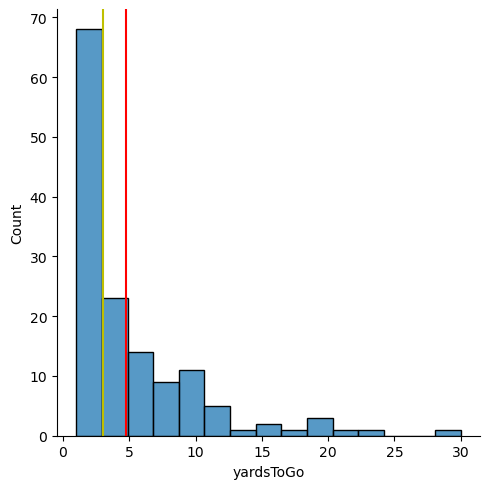

In [49]:
sns.displot(fourth_downs['yardsToGo'])
plt.axvline(x = fourth_downs['yardsToGo'].mean(), color = 'r')
plt.axvline(x = fourth_downs['yardsToGo'].median(), color = 'y')

(array([20.,  0.,  8.,  0., 74.,  0., 20.,  0., 17.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

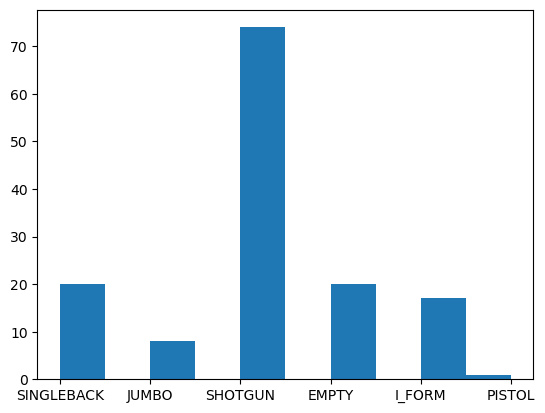

In [42]:
fourth_downs['offenseFormation'].describe()

plt.hist(fourth_downs['offenseFormation'])

In [33]:
grouped_by_q = fourth_downs.groupby('quarter').agg({'yardsToGo': ['mean']})
print(grouped_by_q)

        yardsToGo
             mean
quarter          
1        1.454545
2        4.458333
3        1.714286
4        6.059524


<AxesSubplot:xlabel='quarter'>

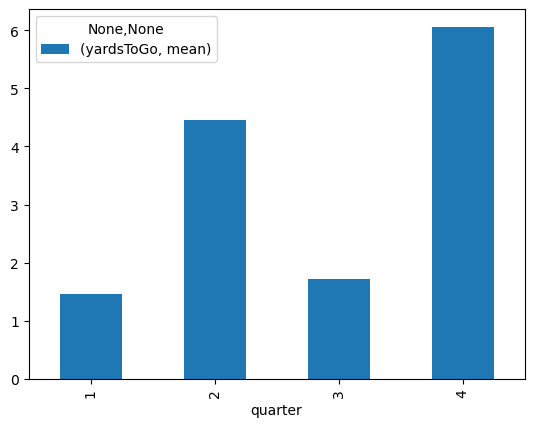

In [34]:
grouped_by_q.plot(kind='bar')